In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math

In [2]:
iris = pd.read_excel("iris.xls")
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
 5   species_num  150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [23]:
def make_color(value):
    color = 'yellow'
    if value == 0:
        color = 'red'
    elif value == 1:
        color = 'green'
    else:
        color = 'blue'


In [4]:
iris_class = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2} #hoac co the dung labelEncoder
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="petallength", y="petalwidth",
                     hue="species_num", palette="Set2", data=iris)
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 720x576 with 1 Axes>

ValueError: 'color' kwarg must be an color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

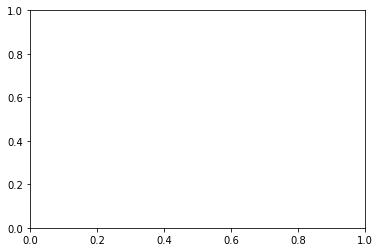

In [24]:
pentallength = iris.petallength.values
petalwidth = iris.petalwidth.values
types = iris.species_num.values
color= [make_color(x) for x in types]
plt.scatter(pentallength, petalwidth, color=color)
plt.show()

In [6]:
X = iris.drop(['iris', 'species_num'], axis =1 )#input
y = iris.species_num #output

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [9]:
clf = LogisticRegression(solver='lbfgs', multi_class= 'multinomial')

In [10]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [11]:
y_predict = clf.predict(X_test)

In [12]:
#kiem tra do chinh xac
clf.score(X_train, y_train)

0.975

In [13]:
#kiem tra do chinh xac
clf.score(X_test, y_test)

1.0

In [14]:
#2 diem so cua train va test gan bang nhau -> khong bi over hoac underfitting

In [15]:
df = pd.DataFrame({'Actual': pd.DataFrame(y_test.values)[0].values, 
                   'Prediction': pd.DataFrame(y_predict)[0].values})
df.head()

,Actual,Prediction
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1


In [16]:
x_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = clf.predict(x_now)
y_now

array([0], dtype=int64)